<a href="https://colab.research.google.com/github/akh1r0ck/pytorch/blob/master/pytorch_autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# autoencoders

## fully connected autoencoder

### setup neural network

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class Autoencoder(nn.Module):
  def __init__(self):
    super(Autoencoder, self).__init__()
    self.en1 = nn.Linear(784,100)
    self.en2 = nn.Linear(100, 10)
    self.de1 = nn.Linear( 10,100)
    self.de2 = nn.Linear(100,784)

  def forward(self, x):
    h = F.relu(self.en1(x))
    h = F.relu(self.en2(h))
    h = F.relu(self.de1(h))
    h = self.de2(h)
    return h

ae = Autoencoder()
print(ae)
criterion = nn.MSELoss()
optimizer = optim.Adam(ae.parameters())

Autoencoder(
  (en1): Linear(in_features=784, out_features=100, bias=True)
  (en2): Linear(in_features=100, out_features=10, bias=True)
  (de1): Linear(in_features=10, out_features=100, bias=True)
  (de2): Linear(in_features=100, out_features=784, bias=True)
)


### dataset

In [0]:
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose( [transforms.ToTensor(),　transforms.Normalize((0.5, ), (0.5, ))])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

### train

In [0]:
for epoch in range(2):

  running_loss = 0.0
  for i, data in enumerate(trainloader, 0):
    inputs, labels = data
    inputs = inputs.view([4,784])

    optimizer.zero_grad()

    outputs = ae(inputs)

    loss = criterion(outputs, inputs)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
    if i % 2000 == 1999:
      print("[{}, {}] loss: {}".format(epoch+1, i+1, running_loss/2000))
      running_loss = 0.0
     

RuntimeError: ignored

### test

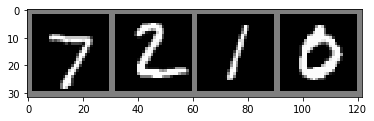

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


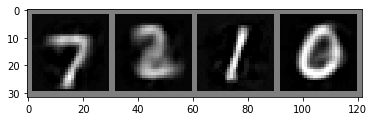

In [0]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
  img = img / 2 + 0.5     # unnormalize
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.show()

dataiter = iter(testloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))

images = images.view([4,784])
outputs = ae(images).view([4,1,28,28]).detach()

imshow(torchvision.utils.make_grid(outputs))


In [0]:
imshow(torchvision.utils.make_grid(images))


## convolutional autoencoder

### setup neural network

In [0]:
class ConvolutionalAutoencoder(nn.Module):
  def __init__(self):
    super(ConvolutionalAutoencoder, self).__init__()
    self.en1 = nn.Conv2d(3, 8, 3)
    self.en2 = nn.Conv2d(8,16, 3)
    self.en3 = nn.Conv2d(16,16, 3)
    self.de1 = nn.ConvTranspose2d(16, 16, 3)
    self.de2 = nn.ConvTranspose2d(16,8,3)
    self.de3 = nn.ConvTranspose2d(8,3,3)

  def forward(self,x):
    h = self.en1(x)
    h = self.en2(h)
    h = self.en3(h)
    h = self.de1(h)
    h = self.de2(h)
    h = self.de3(h)
    return h


ConvolutionalAutoencoder(
  (en1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1))
  (en2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1))
  (en3): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1))
  (de1): ConvTranspose2d(16, 16, kernel_size=(3, 3), stride=(1, 1))
  (de2): ConvTranspose2d(16, 8, kernel_size=(3, 3), stride=(1, 1))
  (de3): ConvTranspose2d(8, 3, kernel_size=(3, 3), stride=(1, 1))
)


### gpu setup

In [0]:
cae = ConvolutionalAutoencoder()
device = torch.device("cuda:0")
cae.to(device)
optimizer = optim.Adam(cae.parameters())

### dataset

In [0]:
transform_cifar = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset_cifar = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_cifar)
trainloader_cifar = torch.utils.data.DataLoader(trainset_cifar, batch_size=4,
                                          shuffle=True, num_workers=2)

testset_cifar = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform_cifar)
testloader_cifar = torch.utils.data.DataLoader(testset_cifar, batch_size=4,
                                         shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


### train

In [0]:
for epoch in range(10):

  running_loss = 0.0
  for i, data in enumerate(trainloader_cifar, 0):
    inputs, labels = data
    inputs = inputs.view([4,3, 32, 32])
    inputs = inputs.to(device)

    optimizer.zero_grad()

    outputs = cae(inputs)

    loss = criterion(outputs, inputs)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
    if i % 2000 == 1999:
      print("[{}, {}] loss: {}".format(epoch+1, i+1, running_loss/2000))
      running_loss = 0.0

[1, 2000] loss: 0.04913564313296229
[1, 4000] loss: 0.042082443486899136
[1, 6000] loss: 0.04108951734611765
[1, 8000] loss: 0.04035177230136469
[1, 10000] loss: 0.04061792579991743
[1, 12000] loss: 0.03981486314209178
[2, 2000] loss: 0.03997223678138107
[2, 4000] loss: 0.03961099513946101
[2, 6000] loss: 0.03992756731342524
[2, 8000] loss: 0.03975114209204912
[2, 10000] loss: 0.03965334097994491
[2, 12000] loss: 0.03893592622177675
[3, 2000] loss: 0.039326206754427405
[3, 4000] loss: 0.03948005101364106
[3, 6000] loss: 0.039088507062755525
[3, 8000] loss: 0.0391836582813412
[3, 10000] loss: 0.03933317320793867
[3, 12000] loss: 0.03917441713018343
[4, 2000] loss: 0.039214844384230674
[4, 4000] loss: 0.039119689553510396
[4, 6000] loss: 0.03906241378374398
[4, 8000] loss: 0.039278485105838624
[4, 10000] loss: 0.039074445828795434
[4, 12000] loss: 0.039219803483691064
[5, 2000] loss: 0.03913482749182731
[5, 4000] loss: 0.03928479335643351
[5, 6000] loss: 0.03923202970949933
[5, 8000] los

### test

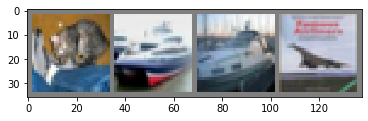

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


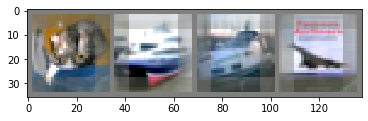

In [0]:
dataiter = iter(testloader_cifar)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
cae = cae.cpu()
images = images.view([4, 3, 32, 32])
outputs = cae(images).view([4, 3, 32, 32]).detach()

imshow(torchvision.utils.make_grid(outputs))
